<a href="https://colab.research.google.com/github/sanjana-ak7/Bioinformatics_lab/blob/main/bioinfo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.8 MB/s eta 0:00:00
Revolution XQi ADS_28.2
(0010,0010) Patient's Name                      PN: ''


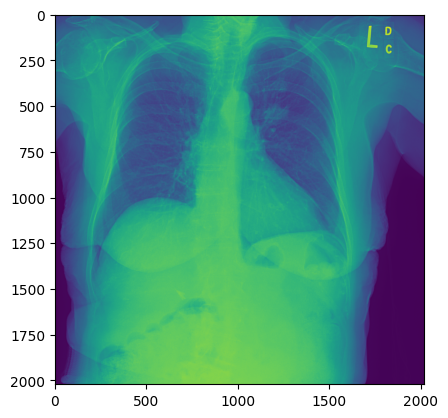

In [ ]:
## DICOM: load data and visualize

!pip install pydicom
!pip install matplotlib


# Import pydicom library
import pydicom as dicom
import matplotlib.pyplot as plt
import gdown
import os

# Downloading the zip archive containing sample images
if not os.path.isdir("Sampledata_5A"):
    gdown.download(
        "https://drive.google.com/uc?export=download&confirm=pbef&id=1Mafu1sTobziya-n-MFCJeR8QftigKhDG",
        "Sampledata_5A.zip",
        quiet=True,
    )
    !unzip -q Sampledata_5A.zip
    os.remove("Sampledata_5A.zip")

# specify your image path
image_path = "/content/Sampledata_5A/Sample5_1.dcm"

ds = dicom.dcmread(image_path)
plt.imshow(ds.pixel_array)

# Viewing Field field tag name or tag number
print(ds.ManufacturerModelName)  # to print manufacturer model name
print(ds[0x10, 0x10])  # for patient name use  'print(ds.PatientName)' or tag number

Attempting to download from: https://drive.google.com/file/d/1OPgTc_4XADW3HT-YsQo4O_6uRwysF-At/view?usp=drive_link
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'doc-14-6o-docs.googleusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
Downloaded BrainMRI_

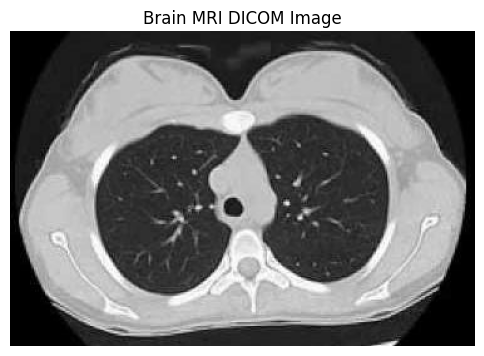

----- DICOM Metadata -----
Study Description : N/A
Modality          : N/A
Patient ID        : N/A
Series Number     : N/A

Accessing via DICOM tag number (Patient's Age):
Age information not available in this DICOM file.


In [ ]:
# Install required libraries
!pip install pydicom matplotlib gdown -q

# Import necessary modules
import pydicom
import matplotlib.pyplot as plt
import gdown
import os

# Create directory for sample data
data_dir = "BrainMRI_Sample"
os.makedirs(data_dir, exist_ok=True)

# Provided Google Drive link
file_url = "https://drive.google.com/file/d/1OPgTc_4XADW3HT-YsQo4O_6uRwysF-At/view?usp=drive_link"
output_file = os.path.join(data_dir, "Brain_MRI.dcm")

# Attempt to download the file using gdown
if not os.path.exists(output_file):
    print(f"Attempting to download from: {file_url}")
    try:
        # Extract the file ID from the URL
        file_id = file_url.split('/')[-2]
        !gdown --id {file_id} --output "{output_file}" --quiet --no-check-certificate
        print(f"Downloaded {output_file} using gdown")
    except Exception as e:
        print(f"Failed to download file from {file_url} using gdown. Error: {e}")
        print("Please ensure the file is publicly accessible ('Anyone with the link' can view).")


# Proceed if the file exists
if os.path.exists(output_file):
    # Read the DICOM file
    try:
        dcm_data = pydicom.dcmread(output_file)

        # Display the DICOM image
        plt.figure(figsize=(6, 6))
        plt.imshow(dcm_data.pixel_array, cmap='gray')
        plt.title("Brain MRI DICOM Image")
        plt.axis('off')
        plt.show()

        # Display key metadata fields
        print("----- DICOM Metadata -----")
        print(f"Study Description : {getattr(dcm_data, 'StudyDescription', 'N/A')}")
        print(f"Modality          : {getattr(dcm_data, 'Modality', 'N/A')}")
        print(f"Patient ID        : {getattr(dcm_data, 'PatientID', 'N/A')}")
        print(f"Series Number     : {getattr(dcm_data, 'SeriesNumber', 'N/A')}")

        # Example of accessing using tag numbers
        print("\nAccessing via DICOM tag number (Patient's Age):")
        if (0x0010, 0x1010) in dcm_data:
            print(dcm_data[0x0010, 0x1010])  # Patient's Age
        else:
            print("Age information not available in this DICOM file.")

    except Exception as e:
        print(f"An error occurred while processing the DICOM file: {e}")
else:
    print("DICOM file was not found after the download attempt. Please check the provided URL and file permissions.")

# Task
Design, implement, and execute a Python-based workflow for retrieving medical imaging records from remote databases. Do not reuse code from previous interactions.

## Identify data source

### Subtask:
Determine the type of remote database (e.g., PACS, cloud storage, etc.) and the necessary connection details (e.g., URL, credentials, etc.).
